loaded 4304 objects
loaded 114 actions
loaded 1521 objects
loaded 103 actions
loaded 3021 objects
loaded 102 actions


<ipython-input-1-ec30a5c4950f>:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-1-ec30a5c4950f>:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-1-ec30a5c4950f>:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-1-ec30a5c4950f>:68: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-1-ec30a5c4950f>:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-1-ec30a5c4950f>:76: UserWarning: Matplotlib is cur

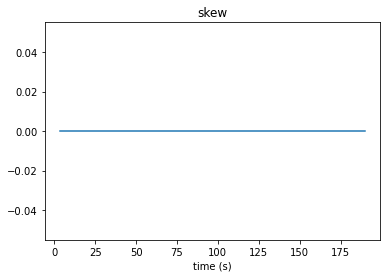

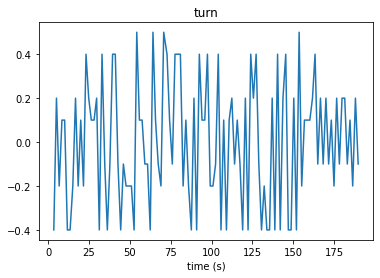

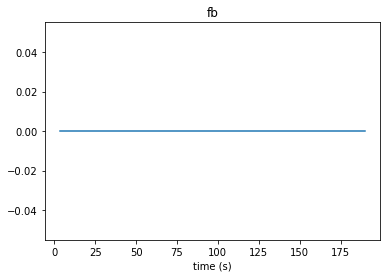

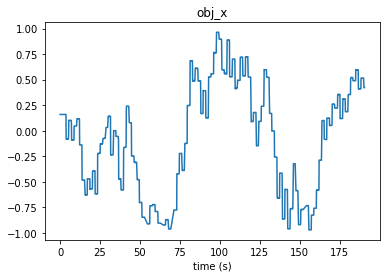

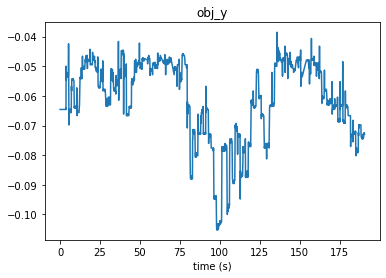

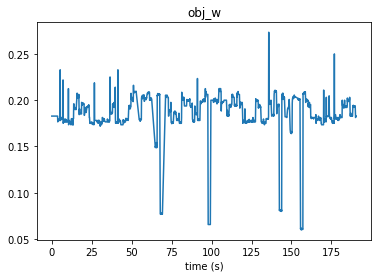

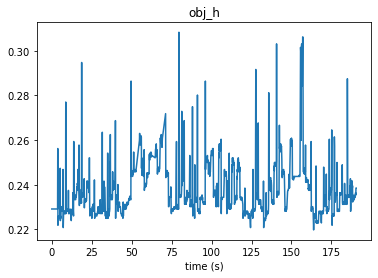

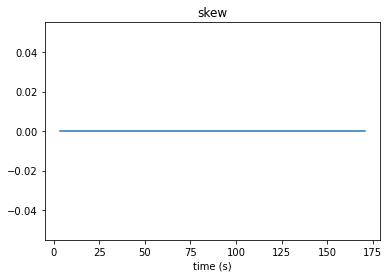

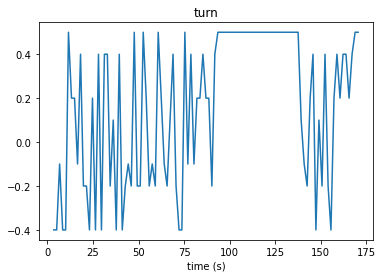

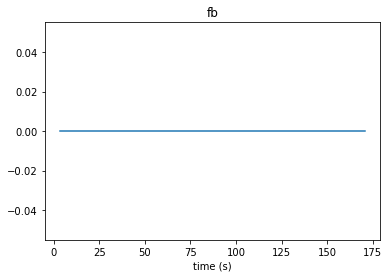

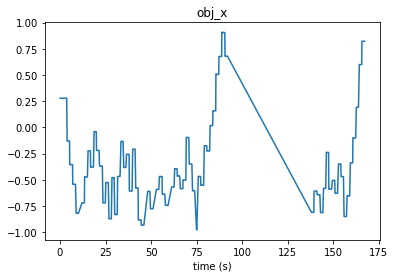

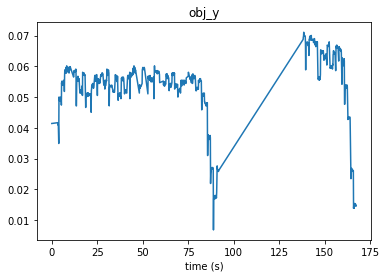

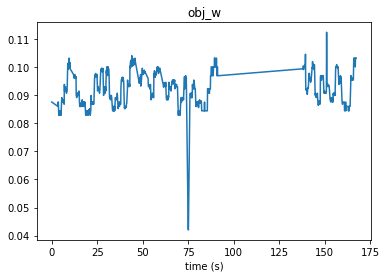

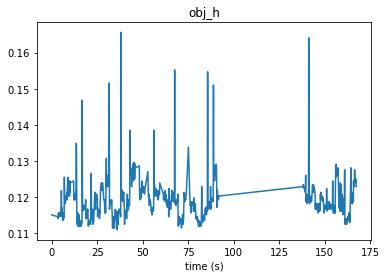

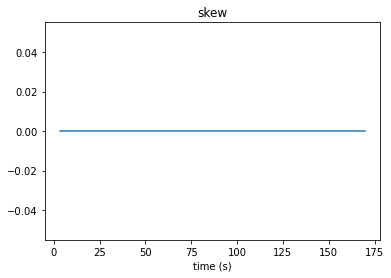

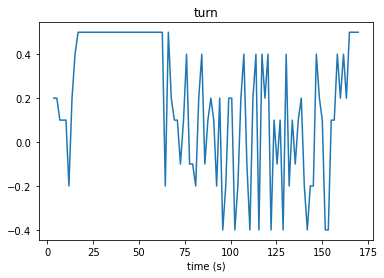

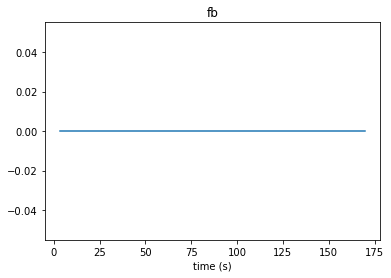

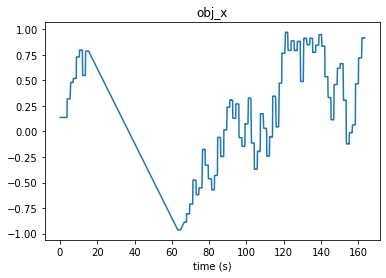

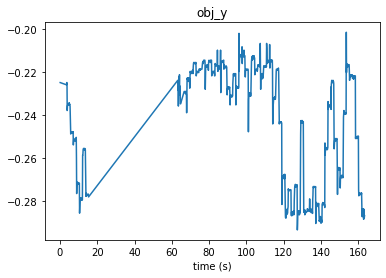

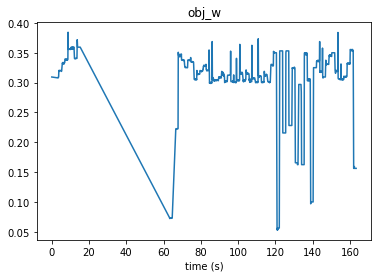

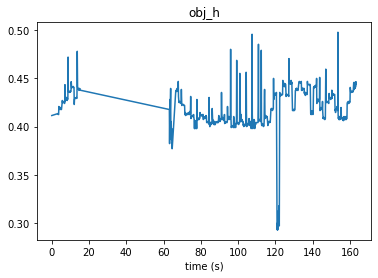

In [1]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

data_loc="../logs/"
data_toload=[]

data_toload.append( [data_loc+"turning_1m_action_log.txt",data_loc+"turning_1m_object_log.txt" ] )
data_toload.append( [data_loc+"turning_2m_action_log.txt",data_loc+"turning_2m_object_log.txt" ] )
data_toload.append( [data_loc+"turning_0.6m_action_log.txt",data_loc+"turning_0.6m_object_log.txt" ] )

#data_toload.append( [data_loc+"forback_left_action.txt",data_loc+"forback_left_object.txt" ] )
#data_toload.append( [data_loc+"forback_right_action.txt",data_loc+"forback_right_object.txt" ] )
#data_toload.append( [data_loc+"forback_align_action.txt",data_loc+"forback_align_object.txt" ] )


object_target="stop_sign"

def load_file(obj_logfile,act_logfile):
    object_time=[]
    object_pos=[]
    action_time=[]
    action=[]
    with open(act_logfile) as f:
        reader=csv.reader(f,delimiter=' ')
        for row in reader:
            action_time.append(float(row[0]))
            action.append( [ float(row[1]),float(row[2]),float(row[3])])        
    f.close()   
    with open(obj_logfile) as f:
        reader=csv.reader(f,delimiter=' ')
        for row in reader:
            if row[1]!=object_target:
                continue
            object_time.append(float(row[0]))
            #x y w h
            cx=0.5*(float(row[3])+float(row[5]))            
            cy=0.5*(float(row[4])+float(row[6]))
            w=float(row[5])-float(row[3])
            h=float(row[6])-float(row[4])
            #object_pos.append( [ (float(row[3])-320)/320,(float(row[4])-240)/240,float(row[5])/320,float(row[6])/240])        
            object_pos.append( [ (cx-320)/320,(cy-240)/240,w/320,h/240])        
    f.close()   
    object_time=np.array(object_time)
    object_pos=np.array(object_pos)
    action_time=np.array(action_time)
    action=np.array(action)
    print("loaded {} objects".format(len(object_time)))
    print("loaded {} actions".format(len(action_time)))
    fig, ax = plt.subplots()
    ax.set(xlabel='time (s)', ylabel='',title='skew')
    ax.plot(action_time,action[:,1])
    fig.show()
    fig, ax = plt.subplots()
    ax.set(xlabel='time (s)', ylabel='',title='turn')
    ax.plot(action_time,action[:,2])
    fig.show()
    fig, ax = plt.subplots()
    ax.set(xlabel='time (s)', ylabel='',title='fb')
    ax.plot(action_time,action[:,0])
    fig.show()   
    
    fig, ax = plt.subplots()
    ax.set(xlabel='time (s)', ylabel='',title='obj_x')
    ax.plot(object_time,object_pos[:,0])
    fig.show()
    fig, ax = plt.subplots()
    ax.set(xlabel='time (s)', ylabel='',title='obj_y')
    ax.plot(object_time,object_pos[:,1])
    fig.show()
    fig, ax = plt.subplots()
    ax.set(xlabel='time (s)', ylabel='',title='obj_w')
    ax.plot(object_time,object_pos[:,2])
    fig.show()
    fig, ax = plt.subplots()
    ax.set(xlabel='time (s)', ylabel='',title='obj_h')
    ax.plot(object_time,object_pos[:,3])
    fig.show()
    
    return [object_time,object_pos,action_time,action]
datasets=[]
for pair in data_toload:
    datasets.append(load_file(pair[1],pair[0]))

<ipython-input-2-3cdb3db4ee43>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-2-3cdb3db4ee43>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-2-3cdb3db4ee43>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-2-3cdb3db4ee43>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-2-3cdb3db4ee43>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-2-3cdb3db4ee43>:30: UserWarning: Matplotlib is cur

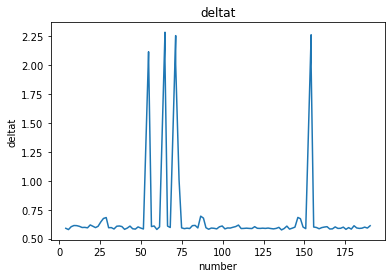

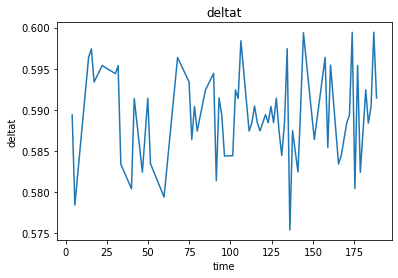

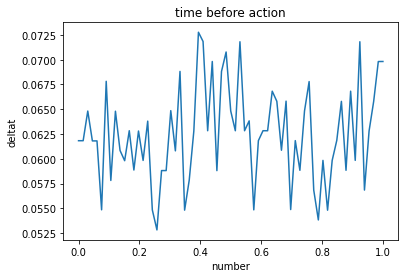

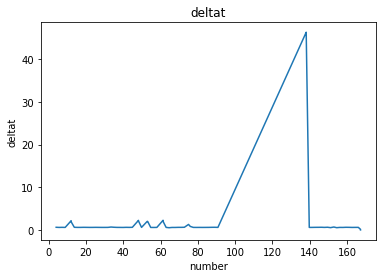

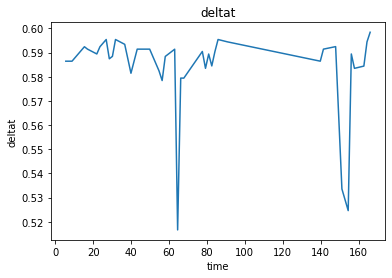

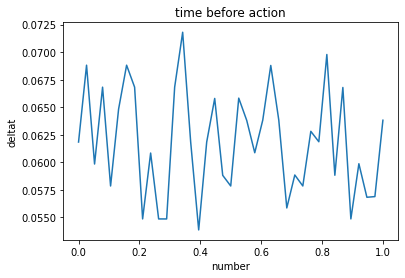

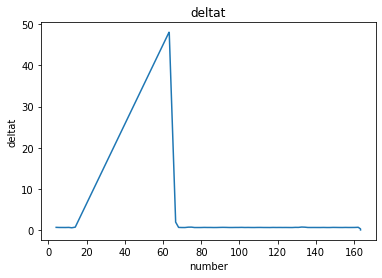

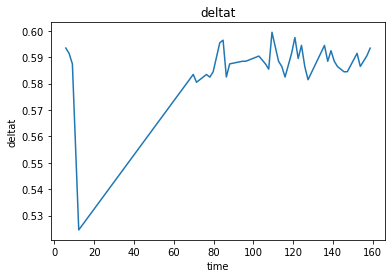

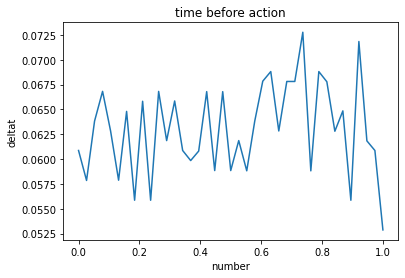

In [2]:
def scour_data(data_raw):
    object_time,object_pos,action_time,action=data_raw
    delay_time=0.45
    max_delay=0.6
    before_index=np.searchsorted(object_time,action_time)-1
    after_index=np.searchsorted(object_time,action_time+delay_time)
    #this is to handle off-end problems    
    object_time_2=np.append(object_time,object_time[-1])
    delta_t=object_time_2[after_index]-object_time_2[before_index]    
    fig, ax = plt.subplots()
    ax.set(xlabel='number', ylabel='deltat',title='deltat')
    ax.plot(object_time_2[after_index],delta_t)
    fig.show()
    usable_indices=(delta_t<max_delay)&(delta_t>delay_time)    
    before_time_indices=before_index[usable_indices]
    after_time_indices=after_index[usable_indices]    
    
    cut_before_state=object_pos[before_time_indices]
    cut_after_state=object_pos[after_time_indices]
    cut_action=action[usable_indices]
    cut_action_time=action_time[usable_indices]
    delta_t=delta_t[usable_indices]
    fig, ax = plt.subplots()
    ax.set(xlabel='time', ylabel='deltat',title='deltat')
    ax.plot(object_time_2[after_index][usable_indices],delta_t)
    fig.show()
    fig, ax = plt.subplots()
    ax.set(xlabel='number', ylabel='deltat',title='time before action')
    ax.plot(np.linspace(0,1,len(delta_t)),cut_action_time-object_time[before_time_indices])
    fig.show()
    return [cut_before_state,cut_after_state,cut_action]
    
scoured_datasets=[]
for dataset in datasets:
    scoured_datasets.append( scour_data(dataset) )

#cut_before_state,cut_after_state,cut_action=scour_data(data_raw)

no good fit


<ipython-input-3-3a8dbd7e0faa>:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\grybk\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\polynomial.py:628: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale
<ipython-input-3-3a8dbd7e0faa>:81: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-3-3a8dbd7e0faa>:88: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-3-3a8dbd7e0faa>:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-3-3a8dbd7e0faa>:100: UserWarning: Matplotlib is currently using 

"\nfig, ax = plt.subplots()\nax.set(xlabel='skew', ylabel='dxdy',title='')\nax.plot(training_x[:,3],training_y,'*')\nfig.show()\nfig, ax = plt.subplots()\nax.set(xlabel='turn', ylabel='dxdy',title='')\nax.plot(training_x[:,4],training_y[:,0],'*')\nfig.show()\n"

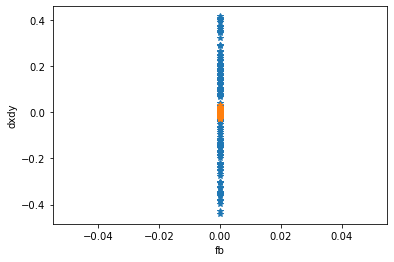

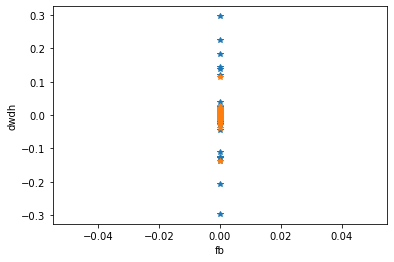

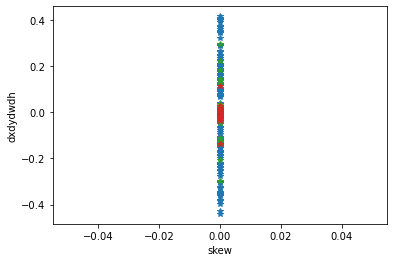

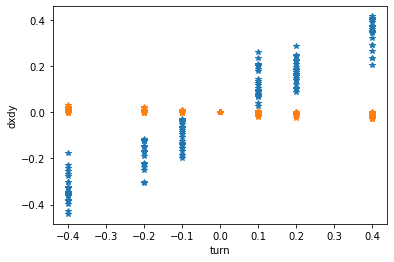

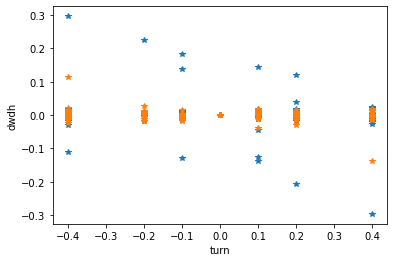

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import csv
import random
import numpy as np

#merge my datasets
cut_before_state=[]
cut_after_state=[]
cut_action=[]
for sdataset in scoured_datasets:
    cut_before_state.extend(sdataset[0])
    cut_after_state.extend(sdataset[1])
    cut_action.extend(sdataset[2])

#add some no actions
for myb in np.linspace(-1,1,10):
    for mym in np.linspace(-1,1,10):
        cut_before_state.append( np.array([myb,mym,0.1,0.1]) )
        cut_after_state.append(  np.array([myb,mym,0.1,0.1]) )
        cut_action.append( np.array( [0,0,0]))

delta_state=[]
for i in range(len(cut_before_state)):
    delta_state.append( cut_after_state[i]-cut_before_state[i])
    
cut_before_state=np.array(cut_before_state)
cut_action=np.array(cut_action)
delta_state=np.array(delta_state)    

#def build_training_set_bmpred(state_before,state_after,action):    
#    training_x=[]
#    training_y=[]    
#    for b,a,act in zip(state_before,state_after,action):
#        if np.abs(a[0]-b[0])<1.0 and np.abs(a[1]-b[1])<1.0:
#            training_x.append(torch.tensor( [b[0],b[1],act[0],act[1],act[2]]))
#            training_y.append(torch.tensor( [a[0]-b[0],a[1]-b[1]]))            
#    #add an array of noaction giving zero
#    for myb in np.linspace(-1,1,10):
#        for mym in np.linspace(-1,1,10):
##            training_x.append(torch.tensor([ myb,mym,0,0,0]))
#            training_y.append(torch.tensor([0,0]))
#    return torch.stack(training_x).float(),torch.stack(training_y).float()

#training_x,training_y=build_training_set_bmpred(cut_before_state,cut_after_state,cut_action)

#fig, ax = plt.subplots()
#ax.set(xlabel='number', ylabel='dx',title='')
#ax.plot(np.arange(len(training_y)),training_y[:,0])
#fig.show()

#fig, ax = plt.subplots()
#ax.set(xlabel='number', ylabel='dy',title='')
#ax.plot(np.arange(len(training_y)),training_y[:,1])
#fig.show()

titles=["x","y","w","h"]
fig, ax = plt.subplots()
ax.set(xlabel='fb', ylabel='dxdy',title='')
#ax.plot(training_x[:,2],training_y,'*')
ax.plot(cut_action[:,0],delta_state[:,0:2],'*')
fig.show()


fig, ax = plt.subplots()
ax.set(xlabel='fb', ylabel='dwdh',title='')
#ax.plot(training_x[:,2],training_y,'*')
ax.plot(cut_action[:,0],delta_state[:,2:4],'*')
try:
    zw=np.polyfit(cut_action[:,0],delta_state[:,2],1)
    print(" fit w {}".format(zw))
    zh=np.polyfit(cut_action[:,0],delta_state[:,3],1)
    print(" fit h {}".format(zh))
    fit_w=np.poly1d(zw)(cut_action[:,0])
    fit_h=np.poly1d(zh)(cut_action[:,0])
    ax.plot(cut_action[:,0],fit_w)
    ax.plot(cut_action[:,0],fit_h)
except:
    print("no good fit")
fig.show()


fig, ax = plt.subplots()
ax.set(xlabel='skew', ylabel='dxdydwdh',title='')
#ax.plot(training_x[:,2],training_y,'*')
ax.plot(cut_action[:,1],delta_state,'*')
fig.show()

fig, ax = plt.subplots()
ax.set(xlabel='turn', ylabel='dxdy',title='')
#ax.plot(training_x[:,2],training_y,'*')
ax.plot(cut_action[:,2],delta_state[:,0:2],'*')
fig.show()

fig, ax = plt.subplots()
ax.set(xlabel='turn', ylabel='dwdh',title='')
#ax.plot(training_x[:,2],training_y,'*')
ax.plot(cut_action[:,2],delta_state[:,2:4],'*')
fig.show()

"""
fig, ax = plt.subplots()
ax.set(xlabel='skew', ylabel='dxdy',title='')
ax.plot(training_x[:,3],training_y,'*')
fig.show()
fig, ax = plt.subplots()
ax.set(xlabel='turn', ylabel='dxdy',title='')
ax.plot(training_x[:,4],training_y[:,0],'*')
fig.show()
"""

[-0.5        -0.47435897 -0.44871795 -0.42307692 -0.3974359  -0.37179487
 -0.34615385 -0.32051282 -0.29487179 -0.26923077 -0.24358974 -0.21794872
 -0.19230769 -0.16666667 -0.14102564 -0.11538462 -0.08974359 -0.06410256
 -0.03846154 -0.01282051  0.01282051  0.03846154  0.06410256  0.08974359
  0.11538462  0.14102564  0.16666667  0.19230769  0.21794872  0.24358974
  0.26923077  0.29487179  0.32051282  0.34615385  0.37179487  0.3974359
  0.42307692  0.44871795  0.47435897  0.5       ]
[-0.48947632068476143, -0.4807467149217359, -0.4658048032874411, -0.4421573701828969, -0.40900132017939145, -0.3695926833477793, -0.33090067765281034, -0.29917618080317937, -0.27623348168314193, -0.2599912329340678, -0.24675095332924116, -0.23250135107439263, -0.21330004102083935, -0.1859852299432498, -0.15010666394357705, -0.10981409938985713, -0.07225950735063334, -0.04268435344884168, -0.021687484772661803, -0.0065586557452417165, 0.006558655745241695, 0.021687484772661764, 0.04268435344884168, 0.07225950

<ipython-input-4-cce46fd12c40>:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


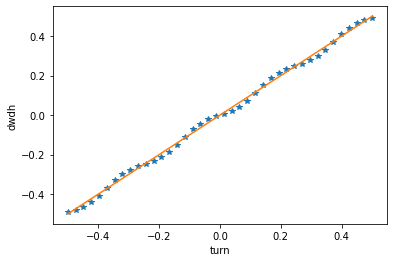

In [4]:
#break these into bins
#format x,y,w,h
#I'm assuming I'm predicting dx dy dw dh
nbins=[5,5,5,5]
scale=[0.5,0.5,0.1,0.1]

def map_number_to_cells(z,nbins,scale):
    ret=[]
    span=1.0*scale/nbins
    for z0 in np.linspace(-scale,scale,nbins):
        ret.append(np.exp( -((z-z0)**2)/(2*span*span)))
    return np.array(ret)

def map_cells_to_number(cells,nbins,scale):
    mysum=0
    myzsum=0
    for i,z0 in zip(range(len(cells)),np.linspace(-scale,scale,nbins)):
        myzsum+=z0*cells[i]
        mysum+=cells[i]
    return myzsum/mysum

xs=np.linspace(-scale[0],scale[0],40)
ys=[]
for x in xs:
    ys.append(map_cells_to_number(map_number_to_cells(x,nbins[0],scale[0]),nbins[0],scale[0]))
    
print(xs)
print(ys)
fig, ax = plt.subplots()
ax.set(xlabel='turn', ylabel='dwdh',title='')
ax.plot(xs,ys,'*')
ax.plot(xs,xs)
fig.show()

In [5]:
def build_training_set(cut_before_state,cut_action,cut_delta_state):
    training_x=[]
    training_y=[]    
    for i in range(len(cut_before_state)):
        training_x.append(torch.tensor( np.concatenate([cut_before_state[i],cut_action[i]])))
        training_y.append(torch.tensor( cut_delta_state[0]))
    return torch.stack(training_x).float(),torch.stack(training_y).float()

training_x,training_y=build_training_set(cut_before_state,cut_action,delta_state)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [06:42<00:00,  4.97it/s]
<ipython-input-12-23f51b0716a0>:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


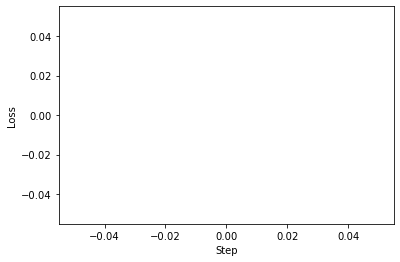

In [12]:
from tqdm import tqdm
model=nn.Sequential(nn.Linear(len(training_x[0]),5),nn.Sigmoid(),nn.Linear(5,2*len(training_y[0])))
class MeanSigmaLoss(nn.modules.loss._Loss):
    def __init__(self, size_average=None, reduce=None, reduction: str = 'mean') -> None:
        super(MeanSigmaLoss, self).__init__(size_average, reduce, reduction)
        
    def forward(self, input: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        n=len(target[0])
        ret=torch.tensor(0.0)
        for i in range(len(input)):
            for j in range(n):
                ret+=(target[i][j]-input[i][j])**2/(2*input[i][n+j]**2)
                ret+=-0.5*torch.log(input[i][n+j])
        return torch.sum(ret)

lr=0.01
optimizer = torch.optim.Adagrad(model.parameters(),lr=lr)
loss_fn=MeanSigmaLoss()


entry=[]
losslog=[]
for i in tqdm(range(2000)):
    optimizer.zero_grad()
    y_pred=model(training_x)
    loss=loss_fn(y_pred,training_y)
    #if i%1000==0 and i !=0:
    #    print("Trial {} Loss {}".format(i,loss.item()/len(training_y)))
    if i%100==0 and i !=0:
        entry.append(i)
        losslog.append(loss.item()/len(training_y))
    loss.backward()
    optimizer.step()

fig, ax = plt.subplots()
ax.plot(entry,losslog)
ax.set(xlabel='Step', ylabel='Loss',title='')
fig.show()


In [13]:
print(losslog)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
